In [258]:
using Flux
using Plots
using CUDA

In [298]:
W = CuArray(rand(10, 5000))
b = CuArray(rand(10))

predict(x) = W*x .+ b

function loss(x, y)
  ŷ = predict(x)
  sum((y .- ŷ).^2)
end

x, y = CuArray(rand(5000)), CuArray(rand(10)) # Dummy data
loss(x, y) # ~ 3

1.5519849449030329e7

In [299]:
gs = gradient(() -> loss(x, y), params(W, b))
losses = []
for i ∈ 1:10000
    W̄ = gs[W]
    b̄ = gs[b]
    W .-= 0.001 .* W̄
    b .-= 0.001 .* b̄
    losses = append!(losses, loss(x,y))
    gs = gradient(() -> loss(x, y), params(W, b))
    #println(loss(x, y))
end

In [263]:
loss(x, y)

9.101916509707397e-28

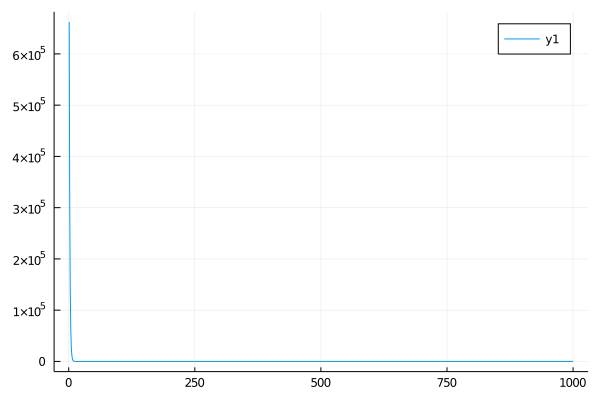

In [275]:
plot(losses)

In [302]:
W = rand(10, 5000)
b = rand(10)

predict(x) = W*x .+ b

function loss(x, y)
  ŷ = predict(x)
  sum((y .- ŷ).^2)
end

x, y = rand(5000), rand(10) # Dummy data
loss(x, y) # ~ 3

1.5452599098226286e7

In [303]:
gs = gradient(() -> loss(x, y), params(W, b))
losses = []
for i ∈ 1:10000
    W̄ = gs[W]
    b̄ = gs[b]
    W .-= 0.001 .* W̄
    b .-= 0.001 .* b̄
    losses = append!(losses, loss(x,y))
    gs = gradient(() -> loss(x, y), params(W, b))
    #println(loss(x, y))
end